<font face="B Mitra" size=4>
<div dir=rtl align=center>
<br>
<img src="https://aut.ac.ir/templates/tmpl_modern01/images/logo_fa.png" alt="Amirkabir University Logo" width="100">
<br>
<font size=5> دانشگاه صنعتی امیرکبیر
(پلی تکنیک تهران)
<br>
<font size=5> دانشکده ریاضی و علوم کامپیوتر


<div dir=rtl>
<font face="B Nazanin" size=4>
در هر بخش، توضیحات مربوط داده شده و سپس سوالاتی با <font color="#ffcc00">رنگ زرد</font> پرسیده شده است. شما باید به این سوالات در گزارش‌کار پاسخ دهید و سلول‌های کد خواسته‌شده را کامل کنید. انتظار می‌رود در انتها، با اجرای دستور Run All تمامی سلول‌های کد به درستی اجرا شوند و نتایج مطلوب را خروجی دهند.

شما مجاز به استفاده از کتاب‌خانه‌های دیگری به‌جز موارد import شده در سلول زیر نیستید.
</font>
</p>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



<div dir=rtl>
<h2>
<font face="B Nazanin" color=#0099cc>
بارگذاری مجموعه داده

<div dir=rtl>
<font face="B Nazanin" size=4>

دستور
`pd.read_csv("your_dataset_file.csv")`
 داده‌های جدول فایل مشخص‌شده را به‌صورت یک متغیرِ دیتافریم از کتاب‌خانه pandas برمی‌گرداند. با ذخیره‌سازی این دیتافریم می‌توانید در محیط پایتون و نوت‌بوک از آن استفاده کنید.

دستور `df.head()` مقادیر ۵ سطر اول دیتافریم df را نمایش می‌دهد. از این دستور استفاده کنید تا ۵ رکورد اول به همراه تمامی ویژگی‌های مجموعه داده را در خروجی ببینید.

</font>
</p>

In [ ]:
# # Students Version
# df = pd.read_csv("your_dataset_file.csv")
# df.head()

In [ ]:
# TA Version
df = pd.read_csv("house_prices.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,N,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,N,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,N,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,N,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,N,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<div dir=rtl>
<font face="B Nazanin" size=4>

با استفاده از دستور `df.shape` می‌توانید ابعاد مجموعه داده را مشاهده کنید.
مجموعه داده این پروژه ۲۱ ستون و ۲۱۶۱۳ سطر دارد، مطمئن شوید که مجموعه داده را به درستی بارگذاری کردید.

</font>
</p>

In [ ]:
df.shape

(21613, 21)

<div dir=rtl>
<h1>
<font face="B Nazanin" color=#0099cc>
پیش‌پردازش داده (Preprocessing)
 </font>
<br>
<font face="B Nazanin" size=4>
ابتدا باید داده‌های خام موجود را تبدیل به داده‌های عددی‌ای تبدیل کنیم که برای مدل‌های یادگیری ماشین معنادارند. توضیحات پیش‌پردازش در چند بخش داده شده است و سپس وظایف مربوط به آن قرار گرفته است.

<div dir=rtl>
<div dir=rtl>
<h3>
<font face="B Nazanin" color=#0099cc>
-حذف داده‌های اضافی

<font face="B Nazanin" size=4>

دستور `df.duplicated()` رکورد (سطر) های تکراری را پیدا می‌کند و با اجرای تابع `sum()` می‌توانید تعداد رکوردهای تکراری را پیدا کنید.

با اجرای دستور `df.drop_duplicates()` یک دیتافریم جدید بدون رکوردهای تکراری ساخته می‌شود.

در صورت وجود رکوردهای تکراری، آن‌ها را حذف کنید.

</font>
</p>

In [ ]:
# # Student Version
# # TODO: Replace `None` with required function calls.
# duplicates = None
# num_duplicates = None

# print("Number of duplicates:", num_duplicates)

In [ ]:
# TA Version
duplicates = df.duplicated()
num_duplicates = duplicates.sum()

print("Number of duplicates:", num_duplicates)

Number of duplicates: 0


<div dir=rtl>
<font face="B Nazanin" size=4>

در این مجموعه داده، ویژگی `id` ارزشی ندارد. سایر ویژگی‌هایی که مقدار آن‌ها اطلاعات عددی ارزشمندی ندارند را نیز شناسایی و حذف کنید.


با تابع `df.drop("column_name", axis=1)` می‌توانید ستون `column_name` را حذف کنید.

 پارامتر `axis` دو مقدار `0` برای سطرها و `1` برای ستون‌ها دارد.

</font>
</p>

In [ ]:
# # Student Version
# # TODO: Replace `None` with required function calls.
# df = None

# df.head()

In [ ]:
df = df.drop(["id", "zipcode"] , axis = 1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,N,0,Average,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,N,0,Average,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,N,0,Average,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,N,0,Very Good,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,N,0,Average,8,1680,0,1987,0,47.6168,-122.045,1800,7503


<div dir=rtl>
<font face="B Nazanin" size=4>

هر مجموعه داده ممکن است دارای مقادیر گم‌شده باشد. برای جایگزینی مقدار گم‌شده یک ویژگی یک سطر، می‌توانید میانگین، مد و... آن ستون را قرار دهید. در صورت تعداد زیاد مقادیر گم‌شده یک رکورد و یا یک ویژگی، می‌توانیم آن را به کل حذف کنیم.
اما در ابتدا باید تعداد مقادیر گم‌شده را پیدا کنیم. در پانداس، با استفاده از تابع `isna()` و یا `isna()` و ترکیب آن با `sum()` می‌توانید تعداد مقادیر گم‌شده هر ستون را در یک متغیر پایتون ذخیره کنید.

</font>
</p>

In [ ]:
# # Student Version
# # TODO: Replace `None` with required functions.
# missing_per_col = None

# print(missing_per_col)

In [ ]:
missing_per_col = df.isnull().sum()

print(missing_per_col)

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


<div dir=rtl>
<h3>
<font face="B Nazanin" color=#0099cc>
-عددی کردن داده‌ها
<font face="B Nazanin" size=4>

با استفاده از دستور `df.dtypes` می‌توانید جنس هر ستون را در یک متغیر ذخیره‌سازی کنید.

</font>
</p>

In [ ]:
datatypes = df.dtypes

datatypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view               int64
condition         object
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

<div dir=rtl>
<font face="B Nazanin" size=4>

هدف این پروژه استفاده از یک مدل رگرسیون برای پیش‌بینی مقادیر عددی است. بنابراین باید ویژگی‌های غیرعددی داده را به ویژگی‌های عددی تبدیل کنیم.

ویژگی‌های غیرعددی انواع متفاوتی دارد، برخی ویژگی‌های عددی‌ای هستند که به شکل غیرعددی (مثلاً رشته) ذخیره شده اند. به سایر ویژگی‌های غیرعددی طبقه‌بندی‌شده و یا Categorical می‌گوییم.

ویژگی‌های طبقه‌بندی‌شده (Categorical) به دو دسته اسمی (Nominal) و ترتیبی (Ordinal) تقسیم می‌شوند.
</font>
</p>
<div>

<div dir=rtl align=center>
<br>
<img src="https://www.scaler.com/topics/images/types-of-categorical-variables.webp" alt="Amirkabir University Logo" width="500">
<br>
<div>

<div dir=rtl>
<font face="B Nazanin" size=4>

برای تبدیل داده‌های طبقه‌بندی‌شده (Categorical) به داده‌های عددی، باید از روش‌های انکودینگ (Endcoding) استفاده کنیم. در این‌جا سه روش انکودینگ ساده معرفی می‌شود.

<div dir=rtl>
<h5>
<font face="B Nazanin">
۱. روش One-Hot Encoding
<div>
<font face="B Nazanin" size=4>
در این روش، به ازای هر مقدار یک ویژگی با داده‌های طبقه‌بندی‌شده، یک ستون با داده‌های باینری ساخته می‌شود.

فرض کنید یک ویژگی مجموعه داده ما شامل مقادیر مختلف A، B، و C باشد و یکی از رکوردهای ما دارای مقدار B باشد. پس از انجام وان‌هات انکودینگ، ویژگی ما با سه ویژگی A, B، و C جایگزین می‌شود. داده‌ای که مقدار B داشت در ستون‌های A و C دارای مقدار `0` و در ستون B دارای مقدار `1` است.

<div dir=rtl>
<h5>
<font face="B Nazanin">
۲. روش Ordinal Encoding
<div>
<font face="B Nazanin" size=4>
در این روش هر مقدار با یک عدد جایگزین می‌شود. در این روش باید اعداد جایگزین‌شده را انتخاب کنیم، این اعداد و فاصله‌شان با یکدیگر در عملکرد مدل تاثیر می‌گذارد و بنابراین باید به دقت انتخاب شوند.

به‌عنوان مثال اگر یک ویژگی با مقادیر Low، Medium و High داشته باشیم می‌توانیم آن را به یک ویژگی جدید با مقادیر `1`، `2` و `3` تبدیل کنیم.

<div dir=rtl>
<font face="B Nazanin" size=4>
از طریق لینک زیر می‌توانید با روش‌های انکودینگ دیگر برای تبدیل داده‌های Categorical به داده‌های عددی آشنا شوید:

<a href="https://medium.com/aiskunks/categorical-data-encoding-techniques-d6296697a40f" target="_blank">Categorical Data Encoding Techniques</a>

</font>

<div dir=rtl>
<font face="B Nazanin" size=4>

با دستور `df["column_name"].unique()`  می‌توانید تمام مقادیر متفاوت ستون `column_name` را در یک آرایه نامپای ذخیره کنید.
<hr>
<font color="#ffcc00">
در سلول زیر مقادیر متفاوت ستون‌های غیرعددی را چاپ کنید و سپس ویژگی‌های Categorical را به ویژگی‌های عددی تبدیل کنید. در این بخش باید روش انکودینگ مناسب را انتخاب کنید و در گزارش‌کار علت انتخاب هر روش را توضیح دهید (۱).
</font>
مطمئن شوید که پس از تبدیل ویژگی‌های غیرعددی به عددی، ویژگی‌های اولیه را از جدول حذف کردید. دقت کنید که در ادامه برای عددی کردن ویژگی تاریخ توضیحات مفصلی داده شده است و فعلاً می‌توانید این ویژگی را بدون تغییر بگذارید.

</font>

In [ ]:
# Student Version
# TODO

In [ ]:
# TA Version
#df["datetime"] = pd.to_datetime(df["date"], format="%Y%m%dT%H%M%S")
#df = df.drop("date", axis=1)
df["waterfront"] = df["waterfront"].map({"Y": 1, "N": 0})
df["condition"] = df["condition"].map({"Poor": 1, "Fair": 2, "Average": 3, "Good": 4, "Very Good": 5})

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


<div dir=rtl>
<font face="B Nazanin" size=4>
یکی از ویژگی‌های این مجموعه داده `date` است که تاریخ و زمان دقیق هر رکورد را مشخص می‌کند. این ویژگی به‌صورت رشته ذخیره شده است و با توجه به ماهیت عددی آن، می‌توانیم به سادگی آن را به یک یا چند ویژگی عددی تبدیل کنیم، اما باید به زمینه‌های مجموعه داده نیز توجه کنیم. در این مدل، داشتن ساعت و یا تاریخ به‌صورت ویژگی‌های مجزا نمی‌تواند اطلاعات مفیدی درباره رکوردها به ما بدهد. به‌عنوان مثال، اگر «ماه» را به‌صورت یک ویژگی مجزا به مجموعه داده اضافه کنیم، ممکن است این برداشت رخ بدهد که یک رکورد با ماه شهریور سه برابر یک رکورد با ماه اردیبهشت ارزش دارد.

در این روش هر متغیری مثل $x$ که در بازه‌هایی به طول $T$ تکرار می‌شود را را از طریق فرمول زیر تبدیل به یک «زاویه رادیان» می‌کنیم و سپس با ورودی دادن آن به توابعی چون سینوس و کسینوس، یک ویژگی عددی می‌سازیم.

$$\operatorname{new\_feature} = \sin(\frac{2\cdot \pi x}{T})$$


$$\operatorname{new\_feature} = \cos(\frac{2\cdot \pi x}{T})$$

برای جلوگیری از این مشکل، می‌توانیم بخش‌های مهم‌تر تاریخ (ماه) را با Cyclical Endcoding ‌‌تبدیل به ویژگی‌های جدید کنیم. در این روش برای تاریخ‌های تکرارشونده مانند روزهای هفته و یا ماه‌های سال، از توابع سینوسی و کسینوسی استفاده می‌کنیم تا عدد مربوط به آن معنادار شود.

توضیحات بیش‌تر راجع‌به Cyclical Encoding را می‌توانید از طریق لینک‌های زیر مطالعه کنید.

<a href="https://towardsdatascience.com/cyclical-encoding-an-alternative-to-one-hot-encoding-for-time-series-features-4db46248ebba/" target="_blank">Cyclical Encoding: An Alternative to One-Hot Encoding for Time Series Features</a>

<a href="https://shrmtmt.medium.com/understand-the-capabilities-of-cyclic-encoding-5b68f831387e" target="_blank">Understand the capabilities of cyclic encoding</a>

<hr>

ابتدا با تابع `pd.to_datetime(df["date"], format="%Y%m%dT%H%M%S")` یک ویژگی جدید از جنس `datetime` بسازید. `datetime` یک شی از کتاب‌خانه پانداس است که استتخراج بخش‌های مختلف تاریخ و ساعت را برای ما راحت‌تر می‌کند.

حال با دستورهایی مثل `df["datetime"].dt.year` می‌توانید بخش‌های مختلف تاریخ را استخراج کنید.

<font color="#ffcc00">در سلول زیر، باید ویژگی `date` را به یک یا چند ویژگی عددی جدید با اطلاعات ارزشمند تبدیل کنید. با توجه به مجموعه داده و هدف مدل نهایی‌ای که قرار است بر این مجموعه اجرا شود، بخش‌هایی از تاریخ که اطلاعات مفیدی برای مدل ما دارند را جدا کنید و در صورت نیاز با روش Cyclical Encoding آن‌ها را به ویژگی‌های عددی تبدیل کنید. درباره نحوه تبدیل ویژگی تاریخ به ویژگی‌های عددی معنادار در گزارش‌کار خود توضیح دهید (۲).</font>

In [ ]:
df["datetime"] = pd.to_datetime(df["date"], format="%Y%m%dT%H%M%S")
df = df.drop("date", axis=1)


# 1. Long-term trend → Year
df["SaleYear"] = df["datetime"].dt.year

# 2. Seasonality → Month (cyclical encoding)
df["SaleMonth"] = df["datetime"].dt.month
df["Month_sin"] = np.sin(2 * np.pi * df["SaleMonth"] / 12)
df["Month_cos"] = np.cos(2 * np.pi * df["SaleMonth"] / 12)

df = df.drop(columns=["datetime"])

In [ ]:
print(df.shape)


(21613, 22)


<div dir=rtl>
<h3>
<font face="B Nazanin" color=#0099cc>
-حذف داده‌های پرت
<font face="B Nazanin" size=4>

برخی رکوردها ممکن است مقادیری بسیار بزرگ و کوچک داشته باشند و فاصله آن‌ها با میانگین یک ویژگی زیاد باشد. در تحلیل داده‌ها، داده‌های پرت می‌توانند تاثیر نامطلوبی در نتایج داشته باشد.

در این بخش رکوردهایی که قیمت آن‌ها داده پرت محسوب می‌شود را حذف می‌کنیم. برای این کار از نمودار جعبه‌ای استفاده می‌کنیم تا تصویرسازی بهتری از داده‌ها داشته باشیم.

با تابع `df.boxplot("column_name")` می‌توانیم نمودار جعبه‌ای ستون `column_name` را رسم کرده و با تابع `plt.show()` آن نمودار را نمایش دهید.
<br>
در سلول زیر این عملیات را برای ستون قیمت انجام دهید و نمودار جعبه‌ای آن را رسم کنید.

</font>
</p>

In [ ]:
# Student Version
# TODO

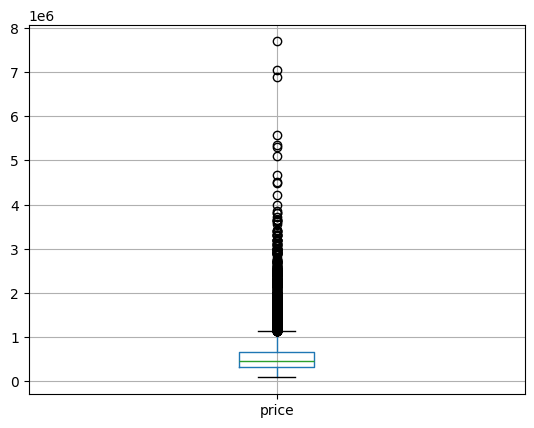

In [ ]:
# TA Version
df.boxplot("price")
plt.show()

<div dir=rtl>
<font face="B Nazanin" size=4>

در صورتی که به درستی نمودار جعبه‌ای را رسم کرده باشید، می‌بینید که به دلیل تعداد زیاد داده‌های پرت این نمودار از شکل جعبه‌ای خارج شده است.

IQR یک مقیاس آماری است که با محاسبه رنج بین چارک اول و سوم، و داشتن یک ضریب،‌ می‌تواند داده‌های پرت را شناسایی کند. در این‌جا با استفاده از تابع پیاده‌سازی شده داده‌های پرت یک ستون با این روش حذف می‌شود.

<hr>
<font color="#ffcc00">در مورد روش IQR برای حذف داده‌های پرت تحقیق کنید و به‌صورت مختصر توضیح دهید این روش چگونه داده‌های پرت را شناسایی می‌کند(۳).</font>
</font>
</p>

In [ ]:
def remove_outliers_iqr(df, column, k=1.5):
    s = pd.to_numeric(df[column], errors="coerce")
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1

    if pd.isna(iqr) or iqr == 0:
        return df[ s.notna() ].copy()

    lower = q1 - k * iqr
    upper = q3 + k * iqr

    mask = (s >= lower) & (s <= upper)
    return df[mask].copy()

<div dir=rtl>
<font face="B Nazanin" size=4>

در سلول زیر با استفاده از تابع `remove_outliers_iqr()` داده‌های پرت ستون قیمت را حذف کنید.


</font>
</p>

In [ ]:
# # Student Version
# # TODO
# df = None

# df.shape

In [ ]:
# TA Version
df = remove_outliers_iqr(df, "price")

df.shape

(20467, 22)

<div dir=rtl>
<font face="B Nazanin" size=4>

در سلول بعدی نمودار جعبه‌ای را مجدداً رسم کنید، آن را با نمودار جعبه‌ای نخست مقایسه کنید.

</font>
</p>

In [ ]:
# Student Version
# TODO

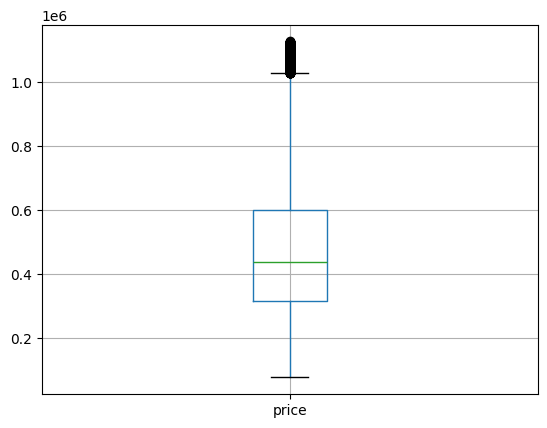

In [ ]:
df.boxplot("price")
plt.show()

<div dir=rtl>
<h3>
<font face="B Nazanin" color=#0099cc>
-استانداردسازی و نرمال‌سازی داده‌ها
<font face="B Nazanin" size=4>

ویژگی‌های متفاوت، مقادیر و واحدهای متفاوتی دارند. با استانداردسازی می‌توانیم مقادیر یک ویژگی را به یک رنج خاص (معمولاً $[0, 1]$) ببریم. با نرمال سازی تضمین می‌کنیم که واحدهای ویژگی‌های متفاوت تاثیر یکسانی در عملکرد مدل ما داشته باشند. روش‌ها و فرمول‌های مختلفی برای نرمال‌سازی و استانداردسازی وجود دارد که در این‌جا یکی از هر کدام را توضیح می‌دهیم.

<h5>
<font face="B Nazanin">
نرمال‌سازی Min-Max
<font face="B Nazanin" size=4>

اگر یک داده با مقدار $X$ داشته باشیم، مقدار نرمال‌سازی‌شده را از فرمول زیر به دست می‌آوریم:
<div dir=ltr>

$$X_{\text{normalized}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$$
<div dir=rtl>

در نرمال‌سازی هدف ما بردن داده‌ها به یک مشخص است. این روش به داده‌های پرت حساس است و برای الگوریتم‌هایی مناسب است که بر اساس فاصله کار می‌کند.

برای محاسبه این مقدار می‌توانید از کلاس `MinMaxScaler()` در کتاب‌خانه sklearn استفاده کنید.



<h5>
<font face="B Nazanin">
استانداردسازی Z-Score
<font face="B Nazanin" size=4>

اگر یک داده با مقدار $X$، و $\mu$ میانگین کل داده‌های آن ویژگی، و $\sigma$ انحراف معیار داده‌های آن ویژگی باشد، آن‌گاه مقدار استانداردشده را از فرمول زیر به دست می‌آوریم:
<div dir=ltr>

$$X_{\text{standardized}} = \frac{X - \mu}{\sigma}$$
<div dir=rtl>

در استانداردسازی، میانگین داده‌ها را به صفر می‌بریم به‌طوری که انحراف معیار برابر با یک شود. استانداردسازی بر خلاف نرمال‌سازی بازه مشخصی ندارد و بنابراین به داده‌های پرت حساسیت کمی دارد.

برای محاسبه این مقدار می‌توانید از کلاس `StandardScaler()` در کتاب‌خانه sklearn استفاده کنید.

برای مطالعه بیش‌تر درباره نرمال‌سازی و استانداردسازی می‌توانید به لینک‌های زیر مراجعه کنید:

<a href="https://www.geeksforgeeks.org/machine-learning/what-is-data-normalization/" target="_blank">Data Normalization</a>

<a href="https://www.geeksforgeeks.org/machine-learning/what-is-standardization-in-machine-learning/" target="_blank">Standardization</a>


با استفاده از تابع `df["column_name"].min()` و `df["column_name"].max()` می‌توانید کم‌ترین و بیش‌ترین مقدار ستون `column_name` را بیابید.

همچنین با تابع `df.min(numeric_only=True)` کم‌ترین مقدار تمام ستون‌ها را به دست می‌آورید. مشابه این می‌توانید بیش‌ترین مقادیر تمام ستون‌ها را نیز به دست بیاورید.

همچنین با تابع `df['column_name'].describe()` اطلاعات زیاد متفاوتی (مانند کم‌ترین، بیش‌ترین، میانگین، انحراف معیار و...) خروجی داده می‌شود.
<hr>
<font color="#ffcc00">
تحقیق کنید که برای ویژگی‌های موجود در این مجموعه داده و هدف اصلی این پروژه (اعمال مدل رگرسیون)‌ کدام روش مناسب است. سپس در سلول زیر داده‌ها را استاندارد و یا نرمال کنید. در گزارش‌کار به‌صورت مختصر توضیح دهید که علت انتخاب روش شما چیست(۴).
</font>
</font>
</p>

In [ ]:
# Print all column names
print(df.columns.tolist())

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'SaleYear', 'SaleMonth', 'Month_sin', 'Month_cos']


In [ ]:
# Student Version
# TODO

In [ ]:
# TA Version
columns = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
    'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
    'SaleYear', 'SaleMonth', 'Month_sin', 'Month_cos'
]

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=columns)

print("Shape after scaling:", df_scaled.shape)
print("Mean of first feature:", df_scaled.iloc[:,0].mean())
print("Std of first feature:", df_scaled.iloc[:,0].std())


Shape after scaling: (20467, 22)
Mean of first feature: -1.2359076265725103e-16
Std of first feature: 1.0000244304647932


In [ ]:
df=df_scaled

<div dir="rtl">
<font face="B Nazanin" color=#0099cc>
<h1>
انتخاب ویژگی (Feature Selection)
 </font>
<font face="B Nazanin" size=4>
<br>
انتخاب ویژگی یکی از مراحل مهم در پیش‌پردازش داده است که هدف آن حذف ویژگی‌های کم‌اهمیت یا تکراری برای بهبود عملکرد مدل و کاهش پیچیدگی است. در این پروژه، از
دو روش آماری
ضریب پیرسون
 (Pearson Coefficient)
  و
  اطلاعات متقابل(Mutual Information)
   برای ارزیابی اهمیت ویژگی‌ها نسبت به متغیر هدف (price) استفاده می‌کنیم.
</font>
</div>


<div dir="rtl">
  <h4>
    <font face="B Nazanin" size="4">
      <font color="#0099cc">-ضریب همبستگی پیرسون:</font>
      یک معیار آماری برای سنجش شدت و جهت رابطه‌ی خطی بین دو متغیر کمی است.
      مقدارش بین -1 و +1 قرار می‌گیرد:
      <br><br>
      +1 → همبستگی خطی کامل مثبت <br>
      -1 → همبستگی خطی کامل منفی <br>
       0 → نبود رابطه‌ی خطی
      <br><br>
      در سلول بعدی، ضریب همبستگی پیرسون را بین ستون price و سایر ویژگی‌های عددی محاسبه را کنید و سپس به صورت نزولی آن را مرتب کنید.
    </font>
  </h4>
</div>




<div dir="rtl">
<h4>
<font face="B Nazanin" size=4>
<font color="#ffcc00">سه شرط برای استفاده از ضریب همبستگی پیرسون باید برقرار باشد، آن‌ها را نام ببرید و توضیح دهید که دلیل آن چیست؟(۵)</font>
</font>
</h4>
</div>




<div dir="rtl">
<h4>
<font face="B Nazanin">
<font color="#ffcc00">فرمول استاندارد ضریب همبستگی پیرسون را برای دو متغیر بنویسید و شهود پشت این فرمول را با یک مثال توضیح دهید (۶).</font>
</font>
</h4>
</div>

In [ ]:
x = df.drop('price', axis=1)
y = df['price']

In [ ]:
corr = df.corr()['price'].sort_values(ascending=False)
print('pearson correlations:')
print(corr)

pearson correlations:
price            1.000000
grade            0.631182
sqft_living      0.622333
sqft_living15    0.562090
sqft_above       0.530451
bathrooms        0.455927
lat              0.430762
bedrooms         0.296956
floors           0.273987
view             0.238268
sqft_basement    0.235701
sqft_lot         0.093950
yr_renovated     0.083601
sqft_lot15       0.082420
long             0.070863
yr_built         0.061144
waterfront       0.051449
condition        0.038275
Month_sin        0.010752
SaleYear         0.002037
SaleMonth       -0.013449
Month_cos       -0.046985
Name: price, dtype: float64


<div dir="rtl">
<font face="B Nazanin" size="4">
      <font color="#0099cc">نقشه حرارتی (Heatmap)</font>
یک نوع نمودار بصری است که از رنگ‌ها برای نمایش مقادیر عددی در یک ماتریس (جدول دوبعدی) استفاده می‌کند. هر سلول جدول با یک رنگ خاص پر می‌شود که شدت مقدار آن سلول را نشان می‌دهد. این نمودار را برای ضریب همبستگی پیرسون رسم کنید.
</font>


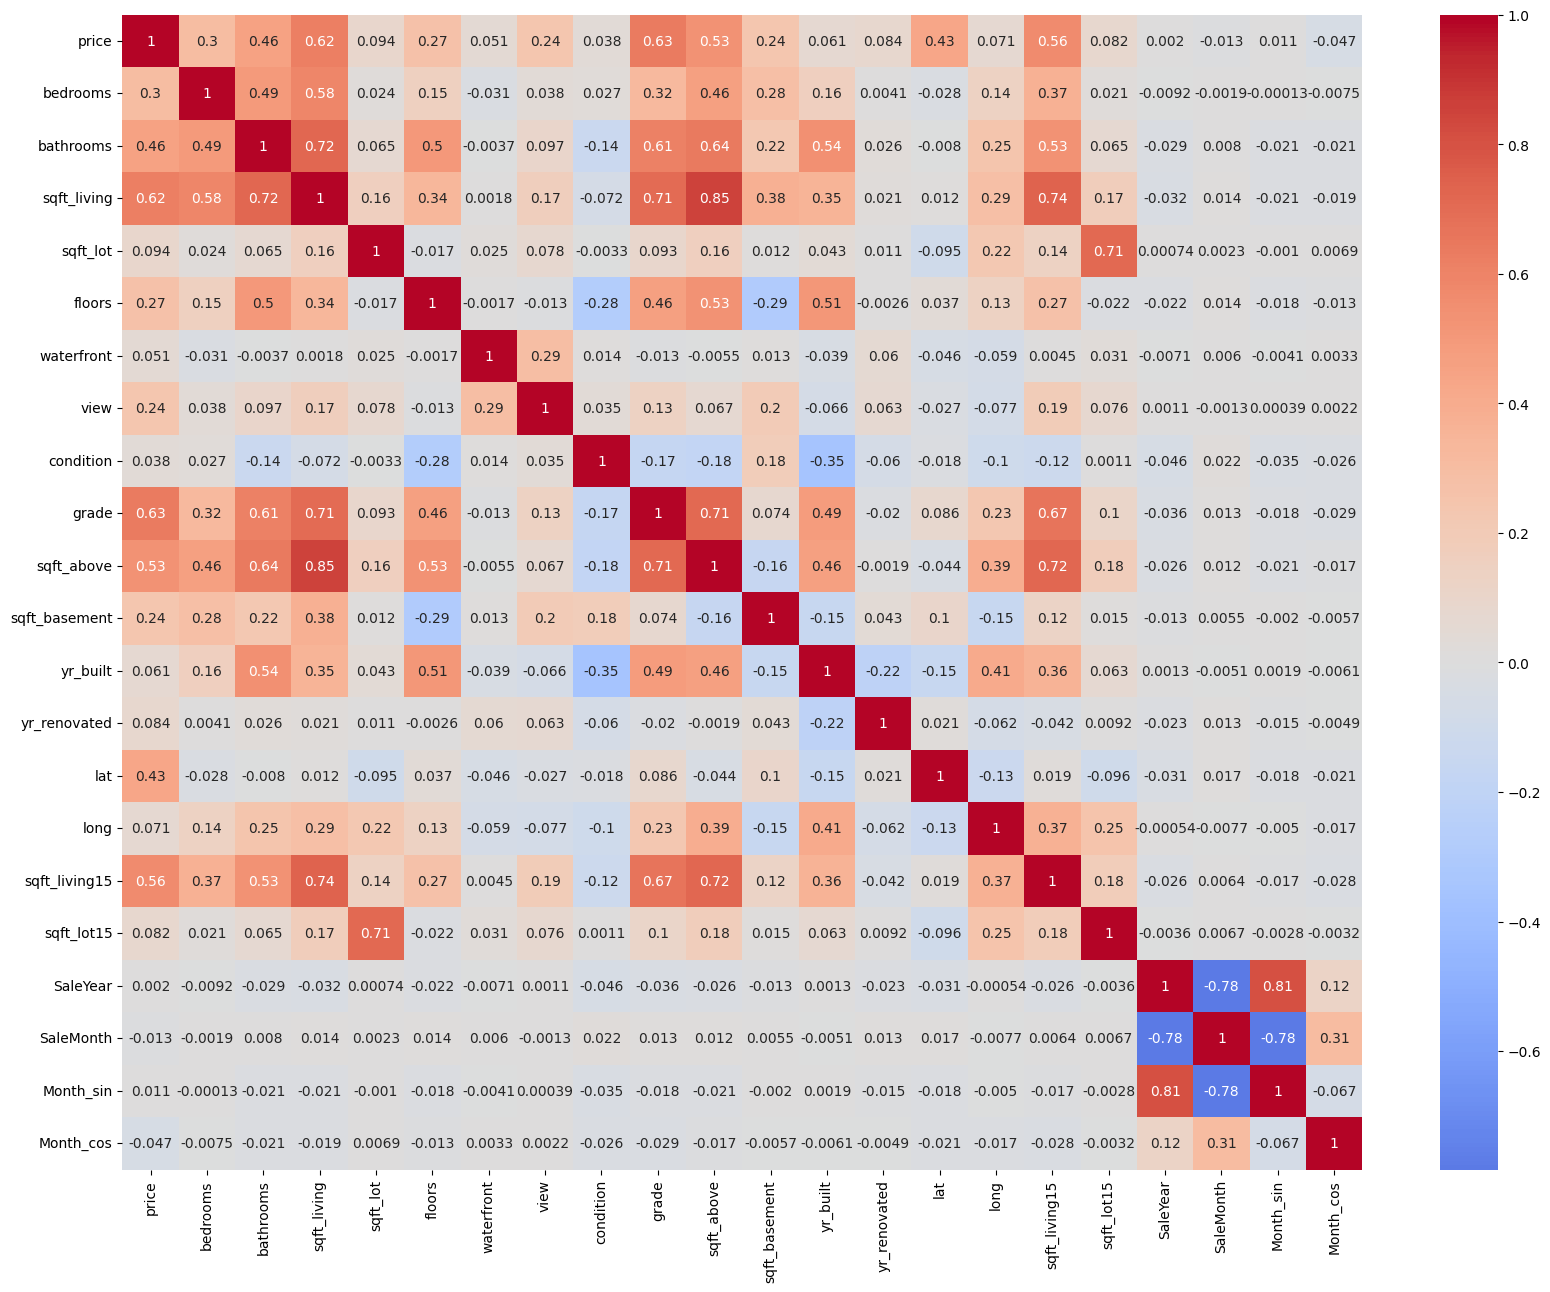

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',center=0)
plt.show()

<div dir="rtl">
<font face="B Nazanin" size=4>
<font color="#ffcc00">
طبق heatmap به دست آمده به سوالات زیر در گزارش کار خود پاسخ دهید:
<br>
- چرا عناصر قطری heatmap همیشه ۱ هستند؟
(۷)
<br>
- کدام ویژگی ها ارتباط بیشتر و کدام ها ارتباط کمتری با قیمت خانه دارند؟(۸)</font>
</font>


<div dir="rtl">
<font face="B Nazanin" size=4>
      <font color="#0099cc">-اطلاعات متقابل(Mutual Information):</font>
 یک معیار است که میزان وابستگی بین دو متغیر را اندازه گیری می‌کند. برخلاف ضریب همبستگی پیرسون که فقط روابط خطی را تشخیص می‌دهد، MI میتواند روابط غیرخطی را هم شناسایی کند و مقدارش همیشه غیرمنفی است و هرچه بالاتر باشد، وابستگی بیشتر است.
در این بخش، MI را برای تمام ویژگی‌های عددی نسبت به price محاسبه کنید و به صورت مرتب شده نمایش دهید.

</font>


<div dir="rtl">
<font face="B Nazanin" size=4>
<font color="#ffcc00">اگر MI یک ویژگی ۰ باشد، چه معنایی دارد؟ در دیتاست، یک ویژگی با MI نزدیک به ۰ پیدا کنید و توضیح دهید.
(۹)
</font>

In [ ]:
x = df.drop('price', axis=1)
y = df['price']

In [ ]:
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(x, y, random_state=42)
mi_df = pd.DataFrame({'feat': x.columns, 'mi': mi}).sort_values('mi', ascending=False)
print('\nMI scores:')
print(mi_df)



MI scores:
             feat        mi
13            lat  0.322785
2     sqft_living  0.267155
8           grade  0.260584
15  sqft_living15  0.215777
9      sqft_above  0.202970
1       bathrooms  0.152024
14           long  0.095957
11       yr_built  0.070988
16     sqft_lot15  0.066667
4          floors  0.065809
0        bedrooms  0.064864
10  sqft_basement  0.049224
3        sqft_lot  0.046340
6            view  0.024487
7       condition  0.014270
12   yr_renovated  0.012621
20      Month_cos  0.000756
5      waterfront  0.000000
17       SaleYear  0.000000
18      SaleMonth  0.000000
19      Month_sin  0.000000


<div dir="rtl">
<font face="B Nazanin" size=4>
در این مرحله، برای انتخاب ویژگی‌های نهایی از ترکیب ضریب همبستگی پیرسون و MI استفاده می‌کنیم. هدف این روش، شناسایی ویژگی‌هایی است که بیشترین ارتباط را با متغیر هدف (price) دارند، چه به‌صورت خطی و چه غیرخطی.
برای معیار پیرسون، آستانه‌ی ثابتی در نظر بگیرید که ویژگی‌هایی که همبستگی خطی قابل‌توجهی با قیمت دارند انتخاب شوند.
 برای معیار MI، به جای تعیین آستانه‌ی عددی ثابت (که ممکن است برای همه داده‌ها مناسب نباشد)، از میانه‌ی مقادیر MI به عنوان حد آستانه استفاده کنید.
در نهایت، تمام ویژگی‌هایی که حداقل یکی از دو شرط بالا را برآورده می‌کنند  به‌عنوان ویژگی‌های منتخب در مدل نگه دارید.
</font>

In [ ]:
# Absolute Pearson correlation with target
pearson = df.corr()['price'].abs().drop('price')

# Mutual Information scores (we already computed mi_df)
mi_series = mi_df.set_index('feat')['mi']

# Define thresholds
pearson_thresh = 0.2
mi_thresh = mi_series.median()

# Select features passing either condition
selected_features = pearson[(pearson >= pearson_thresh) | (mi_series >= mi_thresh)].index

print("\nSelected features (Method 1):")
print(list(selected_features))

# Reduce X to selected features
X_selected = x[selected_features]
print("\nShape before selection:", x.shape)
print("Shape after selection :", X_selected.shape)



Selected features (Method 1):
['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

Shape before selection: (20467, 21)
Shape after selection : (20467, 13)


<div dir="rtl">
<font face="B Nazanin", size=4>
<font color="#ffcc00">اگر همه ویژگی‌ها را نگه داریم، چه مشکلاتی ممکن است پیش
بیاید؟(۱۰)</font>
</font>

<div dir="rtl">
<font face="B Nazanin" size=4>
<font color="#ffcc00">
آیا ویژگی‌های انتخاب‌شده بر اساس معیارهای ضریب همبستگی پیرسون و MI (Mutual Information)، با نتایج حاصل از Heatmap   درباره ارتباط میان ویژگی‌ها و قیمت خانه هم‌خوانی دارند؟
توضیح دهید و در صورت وجود تفاوت، دلیل احتمالی آن را بیان کنید.(۱۱)</font>
</font>


<div dir="rtl">
<font face="B Nazanin" color=#0099cc>
<h1>
      استخراج ویژگی(Feature Extraction)
</font>
</h1>
<font face="B Nazanin" size=4>
      استخراج ویژگی فرآیند تبدیل داده‌های خام به مجموعه‌ای ساده و آموزنده از ویژگی‌ها یا صفات است. این کار پیچیدگی داده‌ها را کاهش می‌دهد و مرتبط‌ترین اطلاعات را برجسته می‌کند و تجزیه و تحلیل و یادگیری کارآمد از داده‌ها را برای مدل‌های یادگیری ماشین آسان‌تر می‌کند. این کار با تمرکز بر جنبه‌های اساسی داده‌ها، نقش مهمی در بهبود دقت مدل و کاهش هزینه‌های محاسباتی ایفا می‌کند.
</font>


<div dir="rtl">
<font face="B Nazanin">

<h3>
-روش های استخراج ویژگی
</h3>

<font face="B Nazanin" size=4>
      برخی روش های استخراج ویژگی برای داده‌های جدولی/عددی عبارت اند از:

۱. Principal Component Analysis (PCA) <br>
۲. Independent Component Analysis (ICA) <br>
۳. Linear Discriminant Analysis (LDA) <br>
۴. t-SNE (t-Distributed Stochastic Neighbor Embedding) <br>
۵. Autoencoders (Neural Networks) <br>
ما در اینجا به روش PCA می‌پردازیم.
</font>

<div dir="rtl">
  <h3>
    <font face="B Nazanin" color=#0099cc>
     - روش PCA (Principal Component Analysis)
    </font>
  </h3>

<font face="B Nazanin" size=4>
      PCA (تحلیل مؤلفه‌های اصلی) یک تکنیک کاهش ابعاد است که در تحلیل داده‌ها و یادگیری ماشین استفاده می‌شود. این تکنیک به شما کمک می‌کند تا تعداد ویژگی‌ها را در یک مجموعه داده کاهش دهید و در عین حال مهم‌ترین اطلاعات را حفظ کنید. این تکنیک ویژگی‌های اصلی شما را به ویژگی‌های جدیدی تبدیل می‌کند که این ویژگی‌های جدید با یکدیگر همپوشانی ندارند و چند ویژگی اول، اکثر تفاوت‌های مهم موجود در داده‌های اصلی را حفظ می‌کنند.
    </font>
  </h4>
</div>

<div dir="rtl">
  <h3>
    <font face="B Nazanin">
      پیاده سازی PCA
    </font>
  </h4>
</div>

<div dir="rtl">
    <font face="B Nazanin" size=4>
      ۱)
      <b>نرمال سازی داده ها </b>
      (که در بخش پیش پردازش انجام شد.)
    </font>
</div>

<div dir="rtl">
  <font face="B Nazanin" size=4>
      ۲)
      <b>محاسبه ماتریس کوواریانس</b>
      <br>
      ماتریس کواریانس یک ماتریس مربعی است که کواریانس بین هر جفت عناصر یک
     بردار تصادفی داده شده را نشان می دهد.
     <br>
      ماتریس کوواریانس (covariance matrix) نشان می‌دهد که هر ویژگی چگونه با سایر ویژگی‌ها همبستگی دارد و چه اندازه با هم تغییر می‌کنند.
      <br><br>
      در PCA، گام دوم محاسبه ماتریس کوواریانس است تا بتوانیم جهت‌هایی از داده‌ها را پیدا کنیم که بیشترین تغییرات (variance) را دارند. این کمک می‌کند تا ویژگی‌های اصلی (principal components) را شناسایی کنیم و بعداً ابعاد داده را کاهش دهیم، بدون اینکه اطلاعات مهم را از دست بدهیم.
  </font>
</div>

<div dir="rtl">
<font face="B Nazanin" size=4 >
<font color="#ffcc00">
در گزارش‌کار خود فرمول کوواریانس میان دو متغیر را نوشته و توضیح دهید و بگویید مقادیر مثبت, منفی و صفر آن چه معنایی دارند(۱۲).</font>
</font>
</div>

In [ ]:
# TO DO: calculate covariance matrix of selected features

In [ ]:
# Covariance matrix
cov_matrix = np.cov(X_selected, rowvar=False)
print("Covariance matrix shape:", cov_matrix.shape)


Covariance matrix shape: (13, 13)


<div dir="rtl">
  <h4>
    <font face="B Nazanin">
      <font color="#0099cc">۳)یافتن مولفه‌های اصلی (Principal Components):</font>
      <b> </b>
      <br><br>
      هدف در این مرحله این است که <b>جهت‌های اصلی تغییرات داده‌ها</b> را پیدا کنیم. برای این کار، از ماتریس کوواریانس که در مرحله قبل محاسبه کردیم، استفاده می‌کنیم و <b>بردار های ویژه(eigenvectors)</b> و <b>مقادیر ویژه (eigenvalues)</b> آن را می‌یابیم.
      <br><br>
      <b>بردار های ویژه (Eigenvectors)</b> جهت‌هایی در فضای ویژگی‌ها هستند که داده‌ها بیشترین واریانس (تغییر) را در آن‌ها دارند. به عبارت دیگر، eigenvectorها محورهایی هستند که داده‌ها بیشترین "کشیدگی" را در آن‌ها دارند.
      <br>
      <b>مقادیر ویژه (Eigenvalues)</b> نشان‌دهنده اهمیت یا میزان تغییرات داده‌ها در جهت هر eigenvector هستند. هر چه مقدار ویژه بزرگ‌تر باشد، آن جهت تغییرات بیشتری دارد و اطلاعات بیشتری را نگه می‌دارد.
      <br><br>
      در این مرحله، با محاسبه eigenvectors و eigenvalues، می‌توانیم ببینیم که کدام جهات بیشترین اطلاعات را در داده‌ها دارند و بعداً از آن‌ها برای کاهش ابعاد استفاده کنیم.
    </font>
  </h4>
</div>


<div dir="rtl">
<font face="B Nazanin" size=4 >
<font color="#ffcc00">
تحقیق کنید چه طور میتوان مقادیر ویژه و بردار ویژه های یک ماتریس را به دست آورد.
(۱۳)
</font>
</font>
</div>

In [ ]:
# TO DO: compute eigenvalues and eigenvectors of covariance matrix
#Then sort eigenvalues and eigenvectors in descending order

In [ ]:
# Eigen decomposition
eig_vals, eig_vecs = np.linalg.eigh(cov_matrix)  # for symmetric matrix

# Sort eigenvalues and eigenvectors in descending order
sorted_idx = np.argsort(eig_vals)[::-1]
eig_vals_sorted = eig_vals[sorted_idx]
eig_vecs_sorted = eig_vecs[:, sorted_idx]

print("Eigenvalues:", eig_vals_sorted)
print("Eigenvectors shape:", eig_vecs_sorted.shape)


Eigenvalues: [4.89571216e+00 1.76738050e+00 1.27726581e+00 1.00383310e+00
 9.59628933e-01 7.12193260e-01 7.04595098e-01 5.68395486e-01
 3.64645649e-01 2.65994186e-01 2.61284444e-01 2.19706579e-01
 1.88265082e-16]
Eigenvectors shape: (13, 13)


<div dir="rtl">
  <h4>
    <font face="B Nazanin">
      <font color="#0099cc">۴)انتخاب مولفه‌های اصلی برتر و نگاشت داده‌ها :</font>
      <br><br>
      هدف در این مرحله این است که فقط آن تعداد از مولفه‌های اصلی (Principal Components) را نگه داریم که بیشترین واریانس  داده‌ها را پوشش دهند، مثلاً ۹۵٪ و سپس داده‌های اصلی را روی این مولفه‌ها نگاشت کنیم.  
      <br>
      پس در این مرحله تعدادی از مولفه ها که بیشترین واریانس، مثلاً ۹۵٪، را در  
      بر می‌گیرند انتخاب شده و
      داده‌های اصلی روی این مولفه‌های اصلی برتر نگاشت میشوند.
      <br>
      این کار باعث کاهش تعداد ویژگی‌ها (ابعاد) می‌شود بدون اینکه الگوهای مهم داده‌ها را از دست بدهیم.
    </font>
  </h4>
</div>


In [ ]:
# TO DO: select top PCs to capture 95% variance
# Then transform original data to top principal components

In [ ]:
# Decide number of PCs to keep (95% variance)
var_explained = eig_vals_sorted / np.sum(eig_vals_sorted)
cum_var_explained = np.cumsum(var_explained)
num_pcs = np.argmax(cum_var_explained >= 0.95) + 1
print("Number of PCs to keep:", num_pcs)

# Project data onto top PCs
top_eig_vecs = eig_vecs_sorted[:, :num_pcs]
X_pca = np.dot(X_selected, top_eig_vecs)
print("Shape after PCA:", X_pca.shape)


Number of PCs to keep: 10
Shape after PCA: (20467, 10)


<div dir="rtl">
  <h4>
    <font face="B Nazanin" color=#0099cc>
    ۵)
    <b>
    تبدیل نتایج PCA به یک DataFrame با نام ستون‌ها</b>
    </font>
  </h4>
</div>

In [ ]:
# TO DO:Create column names and make a DataFrame from PCA-transformed data

In [ ]:
n_pcs = X_pca.shape[1]

# Create column names
pc_columns = [f'PC{i+1}' for i in range(n_pcs)]

# Convert to DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=pc_columns)

# Show first 5 rows
print(X_pca_df.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.390384  0.459860 -0.276077  0.126576 -0.034134  0.513750 -0.290684   
1 -0.130908 -0.437204  1.315242 -0.438455  0.593755  0.302588  0.732571   
2  2.849637  0.132269 -0.081764 -1.257955  1.382882  0.293668 -1.187187   
3  0.717484 -1.867679  0.468961  1.498931 -0.544945 -0.795912  1.005820   
4  0.095009  0.843258 -0.349472 -0.010257  0.734223 -0.526239 -1.050918   

        PC8       PC9      PC10  
0 -0.156076 -0.509073 -0.283747  
1  0.110731  1.169373  0.311616  
2 -0.410924  0.081212  0.050822  
3  0.034247 -0.143198  0.859225  
4  0.106668 -0.593561  0.340632  


<div dir="rtl">
<font face="B Nazanin" size=4 >
<font color="#0099cc" size=5>تقسیم داده ها به test و train</font>
<br><br>
برای اینکه عملکرد واقعی مدل را بسنجیم باید داده‌هایی به آن بدهیم که در جریان تمرین با آنها برخورد نداشته. به همین دلیل باید دیتاست را به دو بخش تست و تمرین تقسیم کنیم که بخش تمرین برای بدست آوردن پارامترهای مدل استفاده می‌شود و بخش تست صرفا برای سنجیدن عملکرد مدل مورد استفاده قرار می‌گیرد و نقشی در بدست آوردن پارامترها ندارد.
</font>
</h4>
</div>

In [ ]:
#student version
X = X_pca_df.values
Y = y.values.reshape(-1, 1)
# add train test split

In [ ]:
# TA version
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

<div dir="rtl">
<font face="B Nazanin" size=4 >
<font color="#0099cc" size=5>رگرسیون خطی (Linear Regression)</font>
<br><br>
<b>رگرسیون خطی</b> یک الگوریتم یادگیری ماشین از نوع یادگیری نظارت شده (Supervised Learning) است که برای پیش‌بینی یک مقدار پیوسته (مانند قیمت خانه یا دمای هوا) استفاده می‌شود.
<br>
هدف اصلی این الگوریتم، پیدا کردن بهترین خط مستقیمی است که رابطه بین یک یا چند متغیر ورودی و یک متغیر خروجی  را توصیف کند.
<br>
این خط به ما اجازه می‌دهد تا با داشتن مقادیر جدید از ورودی‌ها، مقدار خروجی متناظر با آنها را تخمین بزنیم. به عبارت دیگر، رگرسیون خطی به دنبال مدل‌سازی یک رابطه خطی بین متغیرهای مستقل و وابسته است.
<br><br>
ما در این بخش از شما می خوایم که سه نوع رگرسیون خطی <b>ساده (Simple)</b>، <b>لسو (Lasso)</b> و <b>ریج (Ridge)</b> را پیاده سازی کنید.
</font>
</h4>
</div>

<div dir="rtl">
<font face="B Nazanin" size=4>
  <font color="#0099cc" size=4>۱) رگرسیون خطی ساده (Simple Linear Regression)</font>
<br><br>
در رگرسیون خطی هدف این است که بهترین خطی را پیدا کنیم که داده ها را مدلسازی کند.
این خط، رابطه‌ی خطی بین متغیرهای ورودی (که معمولاً با $x$ نشان داده می‌شود) و متغیر خروجی ($y$) را توصیف می‌کند.

<hr>

<h4>فرمول مدل</h4>

فرمول یک خط مستقیم به صورت زیر است که به آن "فرضیه" (Hypothesis) هم می‌گویند:

<div dir="ltr" align="center">

$$h_\theta(x) = \theta_0 + \theta_1 x$$

</div>

در این فرمول:

  - $h_\theta(x)$: مقدار پیش‌بینی‌شده‌ی خروجی است.
  - $x$: متغیر ورودی یا ویژگی است.
    در حالت کلی، وقتی بیش از یک ویژگی داریم،
    <b>x</b> یک <u>بردار از ویژگی‌ها</u> است (مثل x₁، x₂، ...، xₙ).
  - $\theta_0$: بایاس (Bias) یا **عرض از مبدأ** است.
  - $\theta_1$: وزن (Weight) یا **شیب خط** است. در حالت کلی، <b>θ</b> نیز یک <u>بردار از ضرایب مدل</u> است.

<hr>


<h4>تابع هزینه (Cost Function)</h4>

برای سنجش کیفیت مدل، از تابع هزینه **مجموع مربعات خطا (Sum of Squared Errors)** استفاده می‌کنیم. این تابع، تفاوت بین مقادیر پیش‌بینی‌شده و مقادیر واقعی را محاسبه می‌کند:

<div dir="ltr" align="center">

$$J(\theta) = \frac{1}{2} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$$

</div>

که در آن $m$ تعداد کل داده‌های آموزشی است.

<hr>

<h4> روش حل غیرتکراری (معادلات نرمال) </h4>

می‌توان وزن‌ها را به صورت مستقیم و تحلیلی با استفاده از **معادلات نرمال (Normal Equations)** به دست آورد. این روش بدون نیاز به الگوریتم‌های تکراری مانند گرادیان کاهشی، مستقیماً به جواب بهینه می‌رسد:

<div dir="ltr" align="center">

$$\theta = (X^T X)^{-1} X^T \vec{y}$$

</div>

در این فرمول، $X$ ماتریس ورودی‌ها (design matrix) و $\vec{y}$ بردار مقادیر خروجی است.

<hr>

<h4> توضیح فرمول معادلات نرمال </h4>

این فرمول از طریق بهینه‌سازی تابع هزینه به دست می‌آید. برای پیدا کردن مقادیر بهینه‌ی $\theta$ که تابع هزینه $J(\theta)$ را کمینه می‌کنند، باید مشتق تابع هزینه نسبت به $\theta$ را برابر با صفر قرار دهیم.
<br>
<font color="#ffcc00" size=4>در گزارش خود یک توضیح خلاصه از مراحل بدست آوردن این فرمول ارائه دهید.(۱۴)</font>

</div>

In [ ]:
## student version: TODO implement linear regression from scratch and use x_pca_df and y then train sklearn's linear regression class and compare the results


In [ ]:
## TA Version

from sklearn.linear_model import LinearRegression
import numpy as np


X_b = np.hstack([np.ones((X_train.shape[0], 1)), X_train])

X_b_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
y_pred_manual = X_b_test @ w


print("Manual Linear Regression:")
print("-------------------------")
print("Weights (including bias):", w.flatten())
print()

model = LinearRegression()
model.fit(X_train, Y_train)

y_pred_sklearn = model.predict(X_test)

print("Scikit-Learn Linear Regression:")
print("-------------------------------")
print("Coefficients:", model.coef_)




Manual Linear Regression:
-------------------------
Weights (including bias): [-0.00077233 -0.26258593 -0.25019206  0.19502798 -0.32729139  0.2423696
  0.08297431 -0.0472901  -0.07524663  0.1116243  -0.03932291]

Scikit-Learn Linear Regression:
-------------------------------
Coefficients: [[-0.26258593 -0.25019206  0.19502798 -0.32729139  0.2423696   0.08297431
  -0.0472901  -0.07524663  0.1116243  -0.03932291]]


<div dir="rtl">
<font face="B Nazanin" size=4>

<hr>
<font color="#0099cc" size=4>۲)رگرسیون لاسو (Lasso Regression):</font>
رگرسیون لاسو یکی از روش‌های **تنظیم‌سازی (Regularization)** در رگرسیون خطی است که هدف آن جلوگیری از **بیش‌برازش (Overfitting)** می‌باشد.  
در این روش علاوه بر کمینه‌کردن خطای پیش‌بینی، یک جمله‌ی جریمه (Penalty Term) نیز به تابع هزینه اضافه می‌شود تا از بزرگ شدن بیش از حد وزن‌ها جلوگیری شود.

<hr>

<h4> تابع هزینه در رگرسیون لاسو</h4>

در لاسو، جمله‌ی جریمه بر پایه‌ی **مجموع قدرمطلق ضرایب** (L1 norm) است.  
تابع هزینه به صورت زیر تعریف می‌شود:

<div dir="ltr" align="center">

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 + \lambda \sum_{j=1}^{n} |\theta_j|$$

</div>

که در آن:

- $m$: تعداد نمونه‌ها  
- $n$: تعداد ویژگی‌ها  
- $\lambda$: ضریب تنظیم (Regularization parameter) که اندازه‌ی جریمه را کنترل می‌کند  
- $\theta_j$: ضرایب مدل (به جز بایاس)  

<hr>

<font color="#ffcc00">در گزارش خود یک روش برای حل معادله رگرسیون لاسو را توضیح بدهید.(۱۵)</font>

<hr>
<h4> ویژگی مهم لاسو</h4>
لاسو علاوه بر کاهش بیش‌برازش، ویژگی دیگری دارد:  
باعث می‌شود برخی از ضرایب $\theta_j$ دقیقاً برابر صفر شوند.  
این یعنی لاسو می‌تواند به صورت خودکار انتخاب ویژگی (Feature Selection) انجام دهد.
<hr>
<font color="#ffcc00"> در گزارش خود توضیح دهید که چه زمانی از رگرسیون لاسو استفاده می‌کنیم.(۱۶) </font>

</div>


In [ ]:
# TODO: train Lasso Regression on the 10 PC values with scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split

# Split data (if not already split)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, Y_train.ravel())  # train only on training data

# Predictions on test set
y_pred_lasso = lasso_model.predict(X_test).reshape(-1, 1)

# Test MSE
mse_lasso = mean_squared_error(Y_test, y_pred_lasso)

print("Lasso Regression Results")
print("-------------------------")
print("Coefficients:", lasso_model.coef_)
print("Test MSE:", mse_lasso)


Lasso Regression Results
-------------------------
Coefficients: [-0.24286439 -0.19313789  0.11657626 -0.22917168  0.13877119  0.
 -0.         -0.          0.         -0.        ]
Test MSE: 0.3710026073320072


<div dir="rtl">
<font face="B Nazanin" size=4>
<font color="#0099cc" size=4>۳)رگرسیون ریج (Ridge Regression):</font>
رگرسیون ریج نیز مانند لاسو، یکی از روش‌های **تنظیم‌سازی (Regularization)** در رگرسیون خطی است.  
هدف آن کاهش **بیش‌برازش (Overfitting)** از طریق محدود کردن اندازه‌ی ضرایب مدل است.  
برخلاف لاسو که از جمله‌ی جریمه بر پایه‌ی قدرمطلق ضرایب (L1) استفاده می‌کند، در ریج از **مربع ضرایب (L2 norm)** برای جریمه استفاده می‌شود.
<hr>
<h4> تابع هزینه در رگرسیون ریج</h4>
در رگرسیون ریج، تابع هزینه به شکل زیر است:
<div dir="ltr" align="center">
$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 + \lambda \sum_{j=1}^{n} \theta_j^2$$
</div>
که در آن:
- $m$: تعداد نمونه‌ها  
- $n$: تعداد ویژگی‌ها  
- $\lambda$: ضریب تنظیم (Regularization parameter)  
- $\theta_j$: ضرایب مدل (به جز بایاس)  
<hr>
<font color="#ffcc00"> در گزارش خود تفاوت رگرسیون‌های لاسو و ریج را توضیح بدهید.(۱۷) </font>
<hr>
<h4> فرمول تحلیلی ریج </h4>
بر خلاف لاسو که باید با روش‌های عددی حل شود، رگرسیون ریج یک **راه‌حل بسته (Closed-form solution)** دارد.  
با در نظر گرفتن عبارت تنظیم، ضرایب به‌صورت زیر محاسبه می‌شوند:
<div dir="ltr" align="center">
$$\theta = (X^T X + \lambda I)^{-1} X^T y$$
</div>
که در آن:
- $X$: ماتریس ویژگی‌ها  
- $y$: بردار خروجی‌ها  
- $I$: ماتریس همانی (با ابعاد برابر با تعداد ویژگی‌ها)  
<hr>
<font color="#ffcc00"> در گزارش خود توضیح بدهید که چه زمانی از رگرسیون ریج استفاده می‌شود.(۱۸) </font>
</div>


In [ ]:
# TODO: train Ridge Regression on the 10 PC values with scikit-learn

In [ ]:
from sklearn.linear_model import Ridge

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, Y_train.ravel())  # train only on training data

# Predictions on test set
y_pred_ridge = ridge_model.predict(X_test).reshape(-1, 1)

# Test MSE
mse_ridge = mean_squared_error(Y_test, y_pred_ridge)

print("Ridge Regression Results")
print("-------------------------")
print("Coefficients:", ridge_model.coef_)
print("Test MSE:", mse_ridge)


Ridge Regression Results
-------------------------
Coefficients: [-0.26258271 -0.25018333  0.19501876 -0.32727167  0.24235421  0.08296713
 -0.04728633 -0.07523898  0.11160583 -0.03931378]
Test MSE: 0.32066941938464183


<div dir="rtl">
<font face="B Nazanin" size=4>

<h3> پس از اجرای مراحل به سوالات زیر در گزارش خود پاسخ دهید. </h3>

<font color="#ffcc00">
- آیا مقادیر ضرایب (Coefficients) در سه مدل مشابه‌اند یا تفاوت دارند؟ (۱۹) <br>
- تأثیر مقدار **پارامتر α** در مدل‌های لاسو و ریج را چگونه است. (۲۰)
</font>
</div>

<div dir="rtl">
<font face="B Nazanin" size=4  >
<h1><font face="B Nazanin" color=#0099cc>بخش ارزیابی مدل‌ها (Evaluation)</font></h1>
در این بخش قصد داریم عملکرد مدل‌های مختلف رگرسیون را با استفاده از معیارهای خطا ارزیابی و مقایسه کنیم.  
برای این کار ابتدا معیارهای عددی را محاسبه می‌کنیم و سپس با نمودار، نتایج مدل‌ها را مقایسه خواهیم کرد.
</div>


In [ ]:


# Store model predictions
models_predictions = {
    "Linear Regression": y_pred_sklearn,
    "Lasso Regression": y_pred_lasso,
    "Ridge Regression": y_pred_ridge
}

# Create a dictionary for results
results = {}


In [ ]:
import pandas as pd

# Convert real Y values of test set to 1D array
real_values = Y_test.flatten()

# Create DataFrame showing real vs predicted for each model
results_df = pd.DataFrame({
    "Real Values": real_values,
    "Linear Regression Predictions": y_pred_sklearn.flatten(),
    "Lasso Regression Predictions": y_pred_lasso.flatten(),
    "Ridge Regression Predictions": y_pred_ridge.flatten()
})

# Show first few rows
print(results_df.head())


   Real Values  Linear Regression Predictions  Lasso Regression Predictions  \
0    -0.273483                       0.882248                      0.765454   
1    -1.185339                      -0.932333                     -0.362937   
2    -0.993369                      -0.845657                     -0.693602   
3     1.583824                       0.326028                      0.316782   
4    -1.209335                      -1.091654                     -0.813595   

   Ridge Regression Predictions  
0                      0.882235  
1                     -0.932305  
2                     -0.845633  
3                      0.326026  
4                     -1.091603  


<div dir="rtl">
<font face="B Nazanin" size=4>
  <font face="B Nazanin" color=#0099cc>MAE (میانگین قدر مطلق خطا):</font>
میانگین فاصلهٔ مطلق بین مقادیر واقعی و پیش‌بینی‌شده. هرچه مقدار کمتر باشد، دقت مدل بالاتر است.  
<br>
کاربرد: ساده و قابل تفسیر؛ نشان می‌دهد به‌طور متوسط چقدر پیش‌بینی‌ها از مقدار واقعی فاصله دارند.
</div>


In [ ]:
# TODO: Calculate Mean Absolute Error (MAE) for each regression model


In [ ]:
from sklearn.metrics import mean_absolute_error

results = {}

# Compare predictions with Y_test
for name, y_pred in models_predictions.items():
    mae = mean_absolute_error(Y_test, y_pred)  # ✅ use Y_test instead of full y
    results[name] = {"MAE": mae}

results_df = pd.DataFrame(results).T
display(results_df)


,MAE
Linear Regression,0.425893
Lasso Regression,0.468778
Ridge Regression,0.425893


<div dir="rtl">
<font face="B Nazanin" size=4>
  <font face="B Nazanin" color=#0099cc>MSE (میانگین مربعات خطا):</font>
<br>
 MSE را برای ارزیابی مدل ها استفاده کنید .
<br>
<font face="B Nazanin" size=4 color="#ffcc00">
معیار میانگین مربعات خطا را توضیح دهید و مزیت این معیار نسبت به MAE را شرح دهید .(۲۱)
</div>


In [ ]:
# TODO: Calculate Mean Squared Error (MSE) for each regression model


In [ ]:
# TA version — MSE
from sklearn.metrics import mean_squared_error

for name, y_pred in models_predictions.items():
    mse = mean_squared_error(Y_test, y_pred)  # ✅ use Y_test
    results[name]["MSE"] = mse

results_df = pd.DataFrame(results).T
display(results_df)



,MAE,MSE
Linear Regression,0.425893,0.320669
Lasso Regression,0.468778,0.371003
Ridge Regression,0.425893,0.320669


<div dir="rtl">
<font face="B Nazanin" size=4>
  <font face="B Nazanin" color=#0099cc>R² (ضریب تعیین):</font>
نشان می‌دهد مدل تا چه اندازه تغییرات داده‌های واقعی را توضیح می‌دهد.  
<br><font color="#ffcc00">در گزارش خود شرح دهید اگر مقدار این معیار نزدیک به یک باشد نشان دهنده چیست؟ (۲۲)</font>
</div>


In [ ]:
# TODO: Calculate R² score for each regression model


In [ ]:
# TA version — R²
from sklearn.metrics import r2_score

for name, y_pred in models_predictions.items():
    r2 = r2_score(Y_test, y_pred)  # ✅ use Y_test
    results[name]["R²"] = r2

results_df = pd.DataFrame(results).T
display(results_df)


,MAE,MSE,R²
Linear Regression,0.425893,0.320669,0.665683
Lasso Regression,0.468778,0.371003,0.613207
Ridge Regression,0.425893,0.320669,0.665683


<div dir="rtl">
<font face="B Nazanin" size=4>
  <font face="B Nazanin" color=#0099cc>نمودار میله‌ای (Bar Chart):</font>
نمایش مقادیر دسته‌بندی شده با ارتفاع میله‌ها؛ برای مقایسهٔ اندازه یا تعداد دسته‌ها استفاده می‌شود.
<br>
در اینجا، محور افقی (<b>x</b>) نشان‌دهنده‌ی مدل‌ها (مثل Linear, Lasso, Ridge) است،
و محور عمودی (<b>y</b>) مقدار خطا یا معیار ارزیابی را نشان می‌دهد.
<br>
هرچه ارتفاع میله کمتر باشد، خطای مدل پایین‌تر و دقت آن بیشتر است.
با یک نگاه می‌توان تشخیص داد کدام مدل عملکرد بهتری دارد.
هدف از رسم نمودار میله‌ای این است که بتوانیم در یک نگاه، مقایسه‌ی دیداری بین مدل‌ها انجام دهیم.
مدلی که در اکثر معیارها (MAE، MSE، MAPE) مقدار کمتری دارد،
به احتمال زیاد مدل بهتری برای داده‌های ما است.
</div>


In [ ]:
# TODO: Plot a bar chart comparing MAE and MSE of all regression models


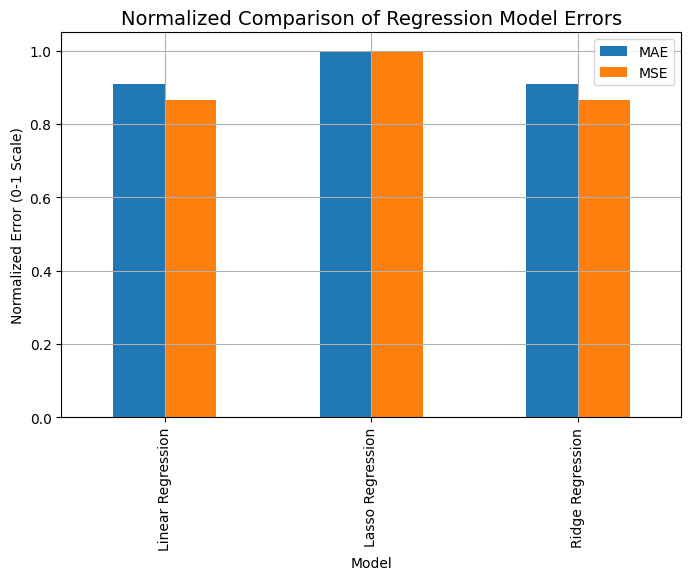

In [ ]:
# TA version — Normalized comparison of MAE and MSE
normalized_results = results_df[["MAE", "MSE"]].apply(lambda x: x / x.max())
normalized_results.plot(kind="bar", figsize=(8,5))
plt.title("Normalized Comparison of Regression Model Errors", fontsize=14)
plt.xlabel("Model")
plt.ylabel("Normalized Error (0-1 Scale)")
plt.grid(True)
plt.show()


<div dir="rtl">
<font face="B Nazanin" size=4>
  <font face="B Nazanin" color=#0099cc>نمودار پراکندگی (Actual vs Predicted Scatter Plot):</font>
<br>
  نمایش نقاط داده روی محورهای x و y برای نشان دادن رابطه یا الگوی بین دو متغیر عددی.
<br>
    در اینجا مجموعه‌ای از نقاط روی صفحه است که در آن:
<br>
محور افقی (X) = مقدار واقعی داده‌ها (Real Values یا y)
<br>
محور عمودی (Y) = مقدار پیش‌بینی‌شده توسط مدل (y_pred)
<br>
هر نقطه نشان‌دهنده‌ی یک نمونه از داده‌ها است.
<br>
<font color="#ffcc00">
در گزارش خود شرح دهید در چه حالتی مدل دقت بیشتری دارد؟
در این سناریو، نمودار پراکندگی مقادیر واقعی و پیش‌بینی‌شده را بررسی کنید و دقت مدل را تحلیل نمایید.(۲۳).</font>
</font>
</div>


In [ ]:
# TODO: Plot scatter plot of actual vs predicted values for the Ridge Regression model


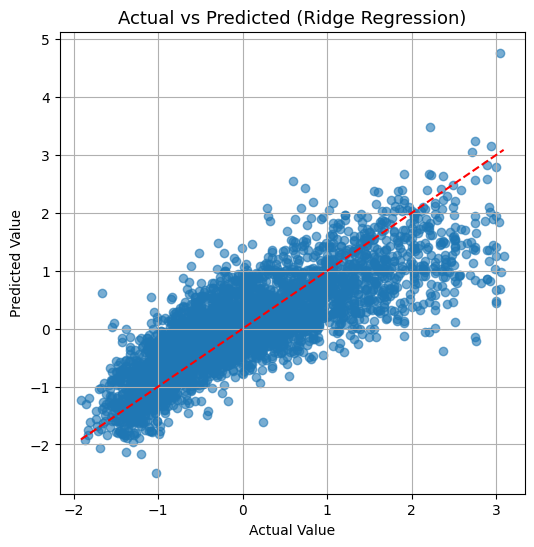

In [ ]:
# TA version — Scatter plot
best_model_name = "Ridge Regression"

plt.figure(figsize=(6,6))
plt.scatter(Y_test, models_predictions[best_model_name], alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title(f"Actual vs Predicted ({best_model_name})", fontsize=13)
plt.grid(True)
plt.show()
